In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

from xgboost import XGBClassifier

import seaborn as sns

%matplotlib inline

In [56]:
from features.amount_features import amount_deviation
from features.time_features import time_features
from features.velocity_features import transaction_velocity
from features.user_behaviour_features import rolling_transaction_count

In [2]:
data = pd.read_csv("dataset/creditcard.csv")
data.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Confirming Class Imbalance

In [6]:
normal = data[data["Class"] == 0]
fraud = data[data["Class"] == 1]

In [7]:
fraud_percentage = data["Class"].value_counts(normalize=True) * 100
print(fraud_percentage)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


<Axes: title={'center': 'Class Distribution of normal = 0 & fraud = 1'}, xlabel='Class'>

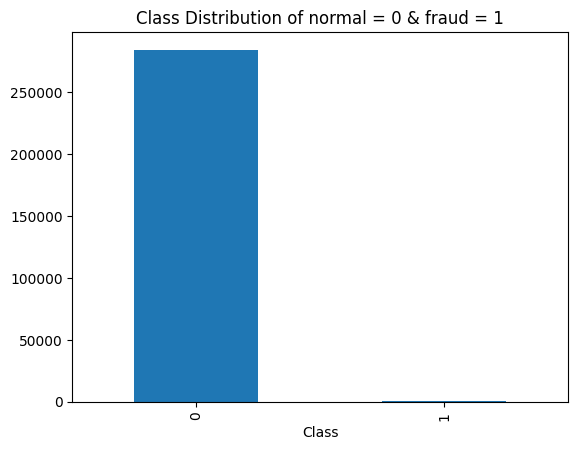

In [8]:
data["Class"].value_counts().plot(kind='bar', title="Class Distribution of normal = 0 & fraud = 1")

Comparing Amount for Fraud vs Normal

In [11]:
fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

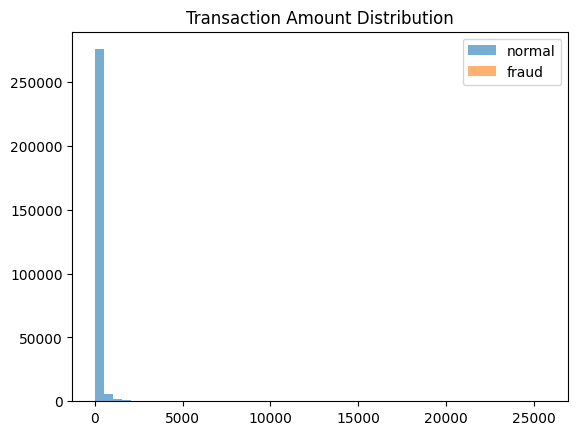

In [13]:
plt.hist(normal["Amount"], bins=50, alpha=0.6, label="normal")
plt.hist(fraud["Amount"], bins=50, alpha=0.6, label="fraud")
plt.legend()
plt.title("Transaction Amount Distribution")
plt.show()

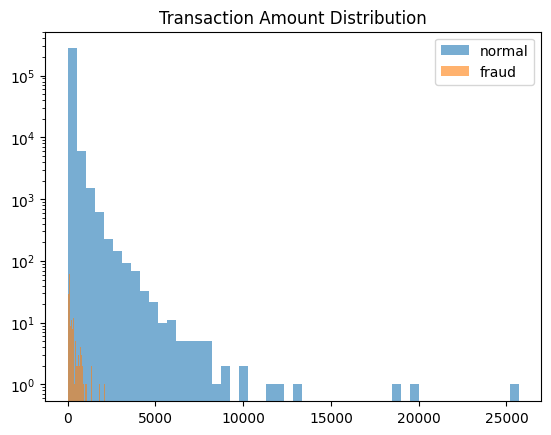

In [14]:
plt.hist(normal["Amount"], bins=50, alpha=0.6, label="normal", log=True)
plt.hist(fraud["Amount"], bins=50, alpha=0.6, label="fraud", log=True)
plt.legend()
plt.title("Transaction Amount Distribution")
plt.show()

/tmp/ipykernel_5250/1141607535.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([normal["Amount"], fraud["Amount"]], labels=["normal", "fraud"], showfliers=True)


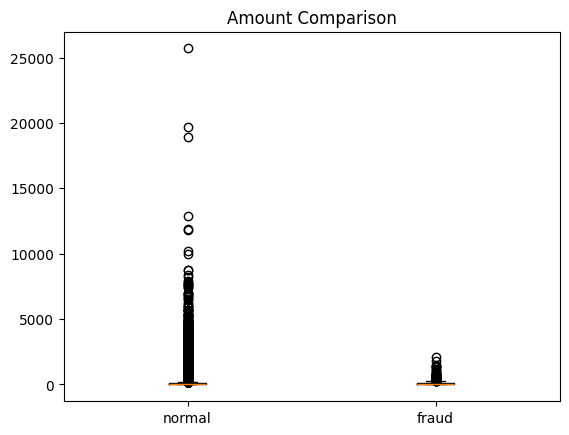

In [15]:
plt.boxplot([normal["Amount"], fraud["Amount"]], labels=["normal", "fraud"], showfliers=True)
plt.title("Amount Comparison")
plt.show()

Fraudulent transactions show a different amount distribution compared to normal transactions. While many fraud transactions involve relatively small amounts, they also exhibit higher variance and more extreme values. This suggests that transaction amount is a useful but insufficient standalone feature.

# TIME-BASED FRAUD ANALYSIS

In [16]:
data["time_hours"] = data["Time"] / 3600

Text(0.5, 1.0, 'Transaction Amount over Time')

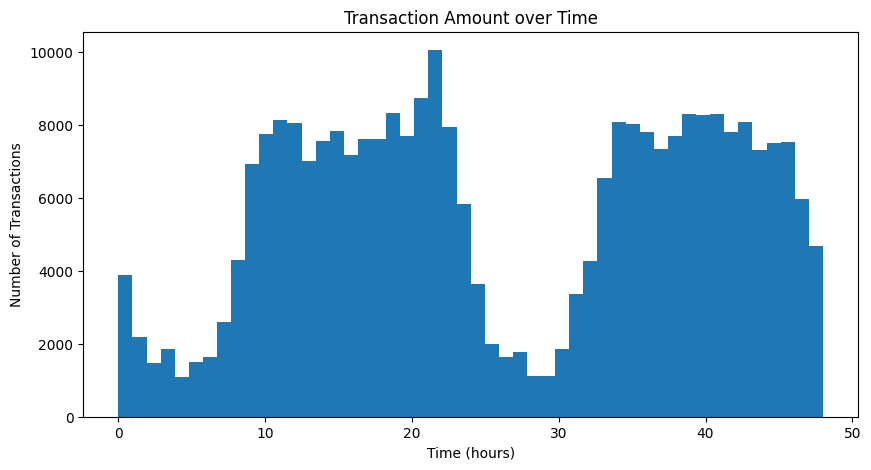

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(data["time_hours"], bins=50)
plt.xlabel("Time (hours)")
plt.ylabel("Number of Transactions")
plt.title("Transaction Amount over Time")

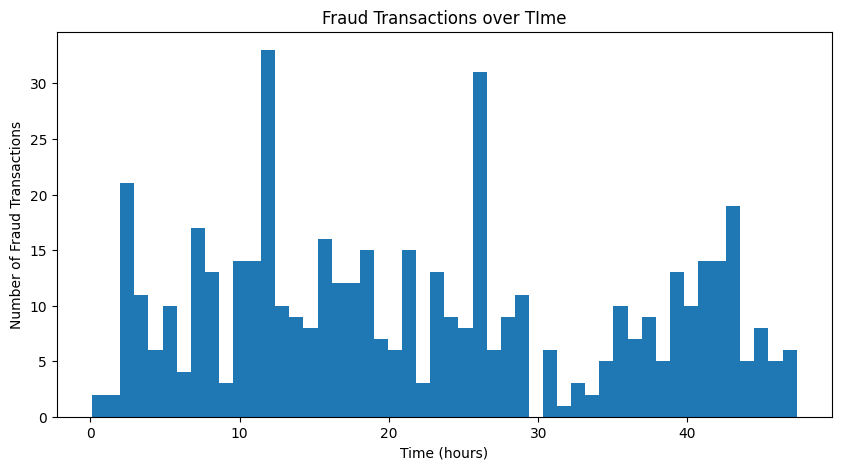

In [18]:
fraud_data = data[data["Class"] == 1]

plt.figure(figsize=(10, 5))
plt.hist(fraud_data["time_hours"], bins=50)
plt.xlabel("Time (hours)")
plt.ylabel("Number of Fraud Transactions")
plt.title("Fraud Transactions over TIme")
plt.show()

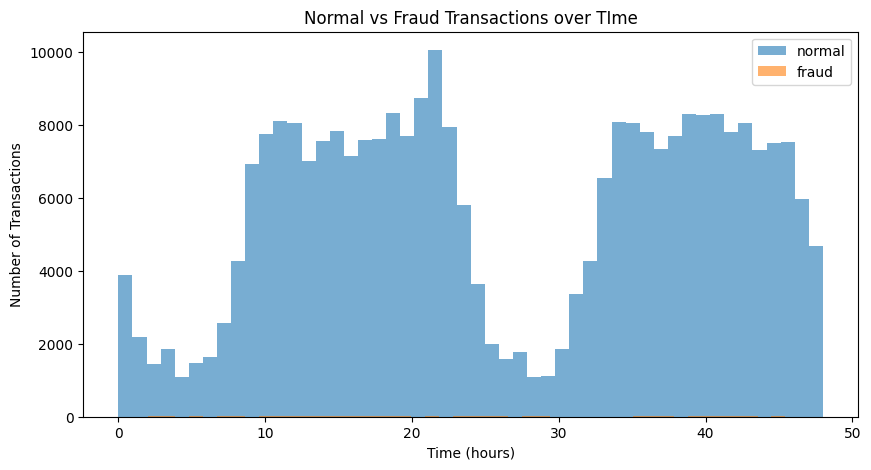

In [19]:
plt.figure(figsize=(10, 5))

plt.hist(data[data["Class"] == 0]["time_hours"], bins=50, alpha=0.6, label="normal")
plt.hist(data[data["Class"] == 1]["time_hours"], bins=50, alpha=0.6, label="fraud")

plt.xlabel("Time (hours)")
plt.ylabel("Number of Transactions")
plt.title("Normal vs Fraud Transactions over TIme")
plt.legend()
plt.show()

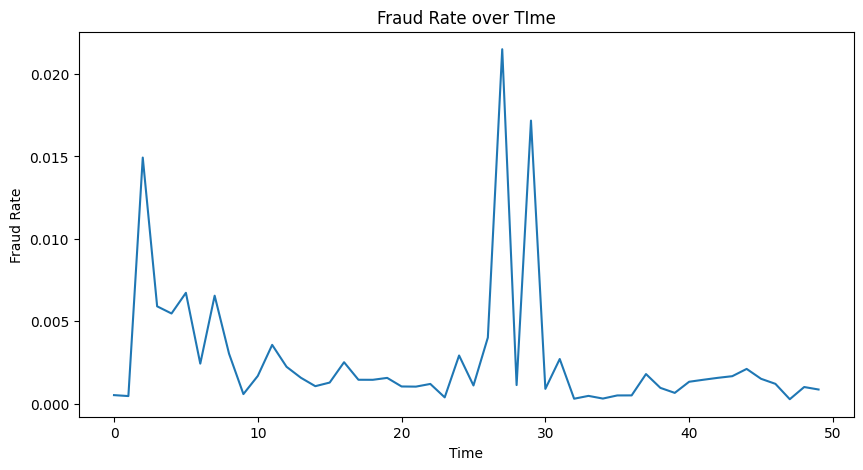

In [20]:
data["time_bin"] = pd.cut(data["time_hours"], bins=50, labels=False)

fraud_rate = data.groupby("time_bin")["Class"].mean()

plt.figure(figsize=(10, 5))
fraud_rate.plot()
plt.ylabel("Fraud Rate")
plt.xlabel("Time")
plt.title("Fraud Rate over TIme")
plt.show()

Fraud transactions are sparse but show temporal clustering, indicating that time-aware splitting is necessary to avoid data leakage.

In [21]:
data_sorted = data.sort_values("Time").reset_index(drop=True)

data_sorted["time_diff"] = data_sorted["Time"].diff().fillna(0)

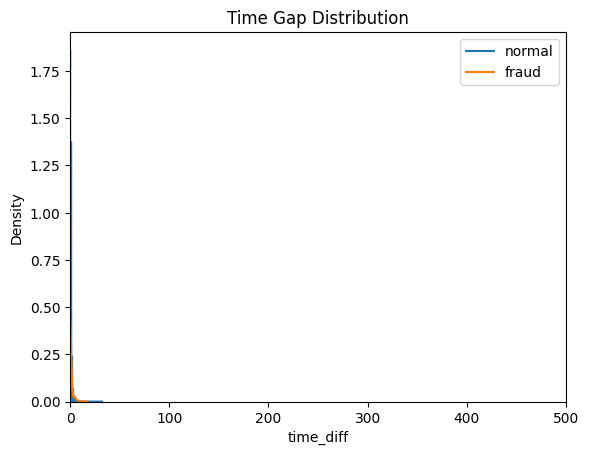

In [22]:
sns.kdeplot(data_sorted[data_sorted["Class"] == 0]["time_diff"], label='normal')
sns.kdeplot(data_sorted[data_sorted["Class"] == 1]["time_diff"], label='fraud')
plt.xlim(0, 500)
plt.legend()
plt.title("Time Gap Distribution")
plt.show()

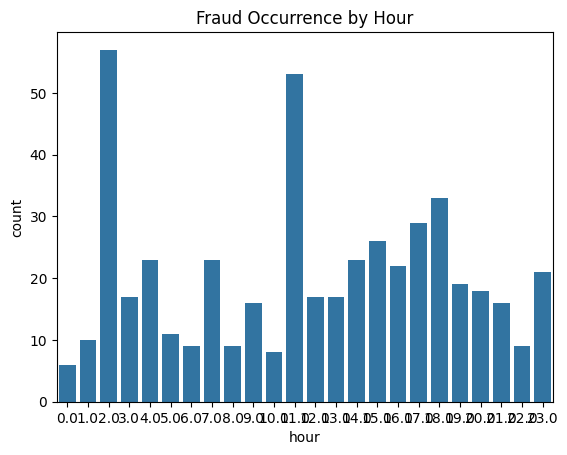

In [23]:
data_sorted["hour"] = (data_sorted["Time"] // 3600) % 24

sns.countplot(
    data=data_sorted[data_sorted["Class"] == 1],
    x="hour"
)

plt.title("Fraud Occurrence by Hour")
plt.show()

FEATURE DISTRIBUTION COMPARISON

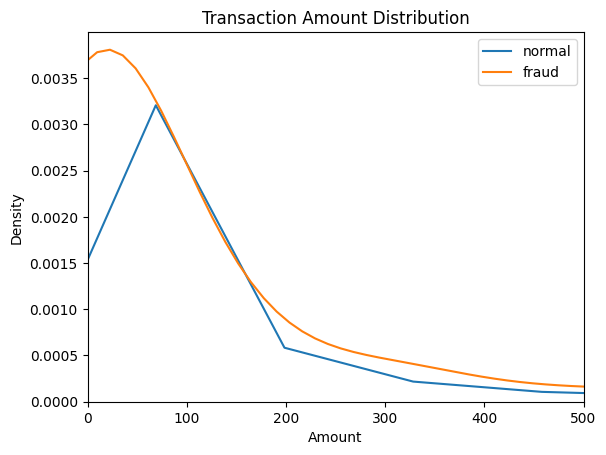

In [24]:
sns.kdeplot(data[data["Class"] == 0]["Amount"], label="normal")
sns.kdeplot(data[data["Class"] == 1]["Amount"], label="fraud")
plt.xlim(0, 500)
plt.legend()
plt.title("Transaction Amount Distribution")
plt.show()

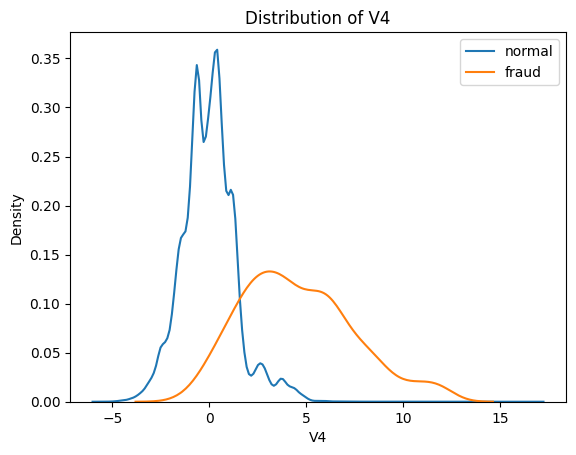

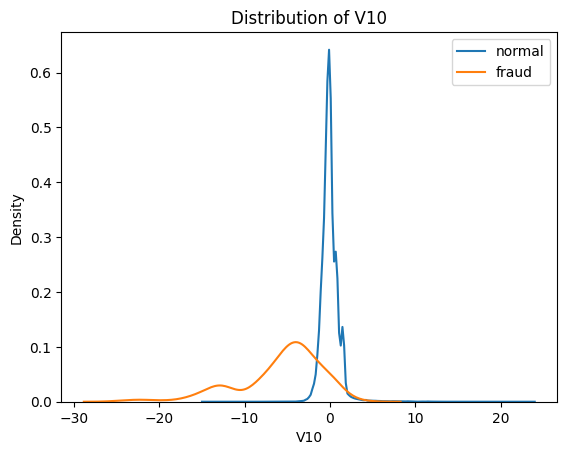

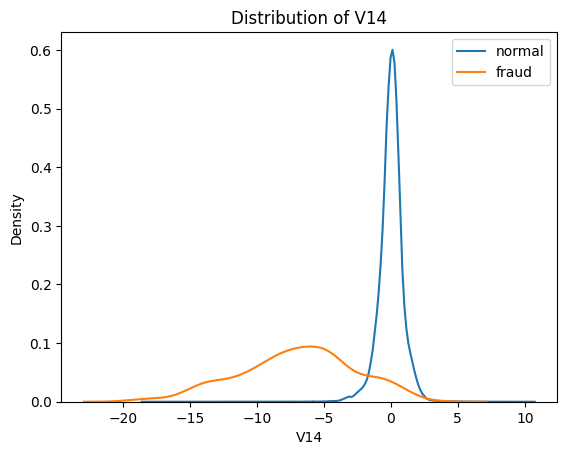

In [36]:
for col in ["V4", "V10", "V14"]:
    sns.kdeplot(data[data["Class"] == 0][col], label="normal")
    sns.kdeplot(data[data["Class"] == 1][col], label="fraud")
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()

Outliers and Anomaly Patterns

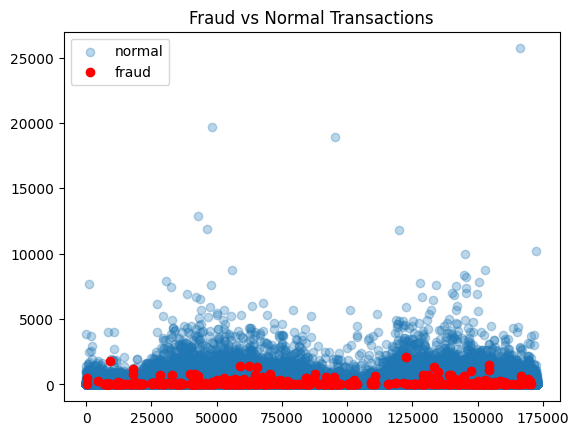

In [39]:
# Fraud often lives in low-density regions but, not all anomalies are fraud
plt.scatter(
    data[data["Class"] == 0]["Time"],
    data[data["Class"] == 0]["Amount"],
    alpha=0.3,
    label="normal"
)

plt.scatter(
    data[data["Class"] == 1]["Time"],
    data[data["Class"] == 1]["Amount"],
    color="red",
    label="fraud"
)

plt.legend()
plt.title("Fraud vs Normal Transactions")
plt.show()

# TRAIN-TEST SPLIT OF DATA

In [68]:
# Data will have to split based on time, as transactions in the real world are based on future transactions
data = data.sort_values("Time").reset_index(drop=True)
split_index = int(0.7 * len(data))

In [69]:
# The first 70% of the data will be used as the training set and the last 30 % of the data will be used as the test set
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

In [70]:
X_train = train_data.drop("Class", axis=1)
y_train = train_data["Class"]

X_test = test_data.drop("Class", axis=1)
y_test = test_data["Class"]

In [71]:
print("Train fraud rate:", y_train.mean())
print("Test fraud rate:", y_test.mean())

Train fraud rate: 0.0019261250777472363
Test fraud rate: 0.0012640005617780275


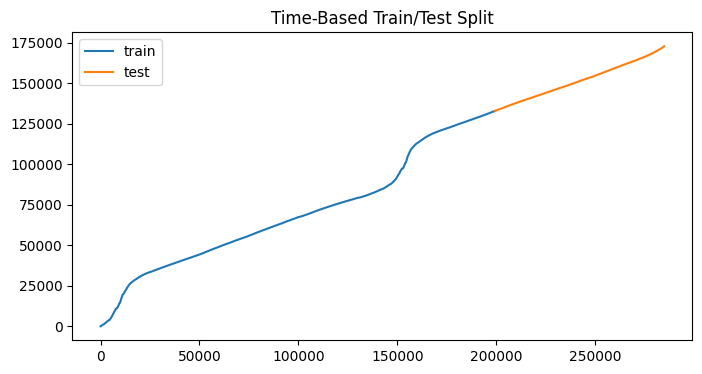

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(train_data["Time"], label="train")
plt.plot(test_data["Time"], label="test")
plt.legend()
plt.title("Time-Based Train/Test Split")
plt.show()

In [30]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[["Time","Amount"]] = scaler.fit_transform(X_train[["Time", "Amount"]])
X_test_scaled[["Time", "Amount"]] = scaler.transform(X_test[["Time", "Amount"]])

In [31]:
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=5000,
)

log_reg.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [32]:
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report", classification_report(y_test, y_pred, digits=4))

ROC-AUC: 0.9782224848038993
Confusion Matrix:  [[83614  1721]
 [   13    95]]
Classification Report               precision    recall  f1-score   support

           0     0.9998    0.9798    0.9897     85335
           1     0.0523    0.8796    0.0988       108

    accuracy                         0.9797     85443
   macro avg     0.5261    0.9297    0.5442     85443
weighted avg     0.9986    0.9797    0.9886     85443



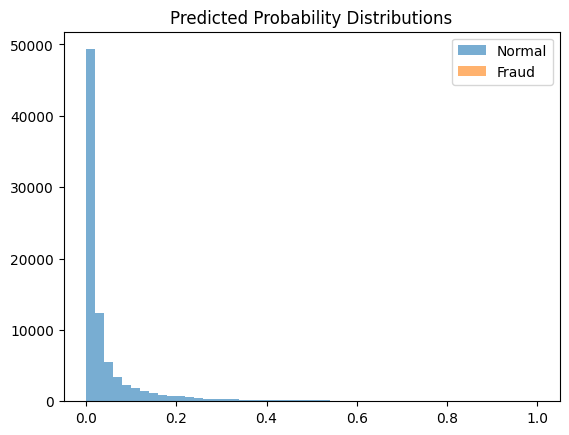

In [33]:

fraud_scores = y_proba[y_test == 1]
normal_scores = y_proba[y_test == 0]

plt.hist(normal_scores, bins=50, alpha=0.6, label='Normal')
plt.hist(fraud_scores, bins=50, alpha=0.6, label='Fraud')
plt.legend()
plt.title("Predicted Probability Distributions")
plt.show()

In [34]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

random_forest.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [35]:
y_pred_rf = random_forest.predict(X_test_scaled)
y_proba_rf = random_forest.predict_proba(X_test_scaled)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_rf))
print("Classification Report", classification_report(y_test, y_pred_rf, digits=4))

ROC-AUC: 0.919272627053725
Confusion Matrix:  [[85335     0]
 [   45    63]]
Classification Report               precision    recall  f1-score   support

           0     0.9995    1.0000    0.9997     85335
           1     1.0000    0.5833    0.7368       108

    accuracy                         0.9995     85443
   macro avg     0.9997    0.7917    0.8683     85443
weighted avg     0.9995    0.9995    0.9994     85443



In [41]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    # scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42
)

xgb.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [44]:
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

ROC-AUC: 0.9844055780160543


In [46]:
# Controlling False Positive Rate < 5%

thresholds = np.linspace(0.01, 0.99, 50)

results = []

for t in thresholds:
    y_pred = (y_proba_xgb >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fpr = fp / (fp + tn)
    recall = tp / (tp + fn)

    results.append((t, fpr, recall))

data_results = pd.DataFrame(results, columns=["threshold", "fpr", "recall"])

In [47]:
data_results[data_results["fpr"] < 0.05].head()

,threshold,fpr,recall
0,0.01,0.001453,0.814815
1,0.03,0.000715,0.814815
2,0.05,0.000469,0.814815
3,0.07,0.000410,0.805556
4,0.09,0.000375,0.805556


In [48]:
best = data_results[data_results["fpr"] < 0.05].sort_values("recall", ascending=False).iloc[0]
best

threshold    0.010000
fpr          0.001453
recall       0.814815
Name: 0, dtype: float64

In [49]:
threshold = best["threshold"]

y_pred_final = (y_proba_xgb >= threshold).astype(int)

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_final))
print("Classification Report", classification_report(y_test, y_pred_final, digits=4))

Confusion Matrix:  [[85211   124]
 [   20    88]]
Classification Report               precision    recall  f1-score   support

           0     0.9998    0.9985    0.9992     85335
           1     0.4151    0.8148    0.5500       108

    accuracy                         0.9983     85443
   macro avg     0.7074    0.9067    0.7746     85443
weighted avg     0.9990    0.9983    0.9986     85443



# FEATURE ENGINEERING PIPELINE

In [66]:
# Since user IDs were anonymized, I simulated user sessions.
data = data.sort_values("Time").reset_index(drop=True)

data["user_id"] = (data.index // 50)

In [67]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,time_hours,time_bin,user_id
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556,0,0


In [72]:
train_fe = train_data.copy()
test_fe = test_data.copy()

In [73]:
train_fe = amount_deviation(train_fe)
train_fe = transaction_velocity(train_fe)
train_fe = rolling_transaction_count(train_fe)
train_fe = time_features(train_fe)

test_fe = amount_deviation(test_fe)
test_fe = transaction_velocity(test_fe)
test_fe = rolling_transaction_count(test_fe)
test_fe = time_features(test_fe)

/home/neville/Documents/Programming/Artificial Intelligence/real_time_fraud_detection_system/features/velocity_features.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["time_since_last_tx"].fillna(999999, inplace=True)
/home/neville/Documents/Programming/Artificial Intelligence/real_time_fraud_detection_system/features/user_behaviour_features.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. Thi

In [74]:
X_train_fe = train_fe.drop("Class", axis=1)
y_train_fe = train_fe["Class"]

X_test_fe = test_fe.drop("Class", axis=1)
y_test_fe = test_fe["Class"]

In [75]:
xgb.fit(X_train_fe, y_train_fe)

y_proba = xgb.predict_proba(X_test_fe)[:, 1]

In [76]:
print("ROC-AUC:", roc_auc_score(y_test_fe, y_proba))

ROC-AUC: 0.984010403442641


In [77]:
threshold = 0.1
y_test_pred = (y_proba >= threshold).astype(int)

In [78]:
confusionMatrix = confusion_matrix(y_test_pred, y_test_pred)
print("Confusion Matrix:\n", confusionMatrix)
print(classification_report(y_test_fe, y_test_pred, digits=4))

Confusion Matrix:
 [[85326     0]
 [    0   117]]
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9997     85335
           1     0.7350    0.7963    0.7644       108

    accuracy                         0.9994     85443
   macro avg     0.8674    0.8980    0.8821     85443
weighted avg     0.9994    0.9994    0.9994     85443



In [ ]:
tn, fp, fn, tp = confusionMatrix.ravel()

fraud_recall = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)

print("Fraud Recall:", fraud_recall)
print("False Positive Rate:", false_positive_rate)

Fraud Recall: 1.0
False Positive Rate: 0.0


# Threshold Tuning to COntrol False Positive

In [ ]:
import numpy as np

thresholds = np.linspace(0.01, 0.9, 100)

best_threshold = None

for t in thresholds:
    preds = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_fe, preds).ravel()
    
    fpr = fp / (fp + tn)
    recall = tp / (tp + fn)
    
    if fpr < 0.05 and recall > 0.7:
        best_threshold = t
        print(f"Threshold {t:.2f} | FPR: {fpr:.4f} | Recall: {recall:.4f}")
        break

print("Chosen threshold:", best_threshold)
